In [47]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt

import matplotlib.pyplot as plt

from scipy.stats import norm

In [23]:
def option_chains(ticker):
    """
    """
    asset = yf.Ticker(ticker)
    expirations = asset.options
    
    chains = pd.DataFrame()
    
    for expiration in expirations:
        # tuple of two dataframes
        opt = asset.option_chain(expiration)
        
        calls = opt.calls
        calls['optionType'] = "call"
        
        puts = opt.puts
        puts['optionType'] = "put"
        
        chain = pd.concat([calls, puts])
        chain['expiration'] = pd.to_datetime(expiration) + pd.DateOffset(hours=23, minutes=59, seconds=59)
        
        chains = pd.concat([chains, chain])
    
    chains["daysToExpiration"] = (chains.expiration - dt.datetime.today()).dt.days + 1
    df = pd.DataFrame(chains)
    df.to_csv('/home/jupyter-swati/LimitOrderBook/Options_Data.csv')
    return chains

In [24]:
options.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration
0,SPY241023C00300000,2024-10-22 14:48:56+00:00,300.0,281.22,0.0,0.0,0.0,0.0,5.0,0,0.00001,True,REGULAR,USD,call,2024-10-23 23:59:59,7
1,SPY241023C00305000,2024-10-21 13:38:33+00:00,305.0,279.15,0.0,0.0,0.0,0.0,2.0,0,0.00001,True,REGULAR,USD,call,2024-10-23 23:59:59,7
2,SPY241023C00400000,2024-10-18 18:56:27+00:00,400.0,185.04,0.0,0.0,0.0,0.0,10.0,0,0.00001,True,REGULAR,USD,call,2024-10-23 23:59:59,7
3,SPY241023C00415000,2024-10-18 17:04:23+00:00,415.0,169.72,0.0,0.0,0.0,0.0,2.0,0,0.00001,True,REGULAR,USD,call,2024-10-23 23:59:59,7
4,SPY241023C00425000,2024-10-17 13:53:22+00:00,425.0,160.20,0.0,0.0,0.0,0.0,NaN,0,0.00001,True,REGULAR,USD,call,2024-10-23 23:59:59,7


In [25]:
#options = option_chains("SPY")
options = pd.read_csv('/home/jupyter-swati/LimitOrderBook/Options_Data.csv')

In [26]:
options

,Unnamed: 0,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration
0,0,SPY241018C00260000,2024-10-17 19:07:08+00:00,260.0,322.95,321.97,323.19,0.520020,0.161281,10.0,725.0,6.109377,True,REGULAR,USD,call,2024-10-18 23:59:59,1
1,1,SPY241018C00265000,2024-10-17 18:27:32+00:00,265.0,317.99,316.97,318.20,2.779999,0.881951,6.0,4.0,5.984378,True,REGULAR,USD,call,2024-10-18 23:59:59,1
2,2,SPY241018C00270000,2024-09-26 15:34:55+00:00,270.0,302.04,311.97,313.18,0.000000,0.000000,101.0,52.0,5.828128,True,REGULAR,USD,call,2024-10-18 23:59:59,1
3,3,SPY241018C00275000,2024-09-26 17:24:39+00:00,275.0,296.38,306.96,308.18,0.000000,0.000000,250.0,150.0,5.679690,True,REGULAR,USD,call,2024-10-18 23:59:59,1
4,4,SPY241018C00280000,2024-10-16 17:14:30+00:00,280.0,301.40,301.98,303.18,0.000000,0.000000,3.0,3.0,5.582034,True,REGULAR,USD,call,2024-10-18 23:59:59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7344,61,SPY270115P00665000,2024-10-11 17:26:25+00:00,665.0,86.76,82.60,87.50,0.000000,0.000000,NaN,1.0,0.079675,True,REGULAR,USD,put,2027-01-15 23:59:59,820
7345,62,SPY270115P00670000,2024-10-02 18:01:23+00:00,670.0,102.50,86.50,91.48,0.000000,0.000000,NaN,1.0,0.077264,True,REGULAR,USD,put,2027-01-15 23:59:59,820
7346,63,SPY270115P00675000,2024-10-04 19:38:40+00:00,675.0,102.69,90.64,95.50,0.000000,0.000000,4.0,0.0,0.074197,True,REGULAR,USD,put,2027-01-15 23:59:59,820
7347,64,SPY270115P00700000,2024-10-16 19:03:59+00:00,700.0,117.95,115.06,120.00,0.000000,0.000000,2.0,0.0,0.083459,True,REGULAR,USD,put,2027-01-15 23:59:59,820


In [36]:

options_df = options[options["optionType"] == "call"]
options_df

,Unnamed: 0,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration
0,0,SPY241018C00260000,2024-10-17 19:07:08+00:00,260.0,322.95,321.97,323.19,0.520020,0.161281,10.0,725.0,6.109377,True,REGULAR,USD,call,2024-10-18 23:59:59,1
1,1,SPY241018C00265000,2024-10-17 18:27:32+00:00,265.0,317.99,316.97,318.20,2.779999,0.881951,6.0,4.0,5.984378,True,REGULAR,USD,call,2024-10-18 23:59:59,1
2,2,SPY241018C00270000,2024-09-26 15:34:55+00:00,270.0,302.04,311.97,313.18,0.000000,0.000000,101.0,52.0,5.828128,True,REGULAR,USD,call,2024-10-18 23:59:59,1
3,3,SPY241018C00275000,2024-09-26 17:24:39+00:00,275.0,296.38,306.96,308.18,0.000000,0.000000,250.0,150.0,5.679690,True,REGULAR,USD,call,2024-10-18 23:59:59,1
4,4,SPY241018C00280000,2024-10-16 17:14:30+00:00,280.0,301.40,301.98,303.18,0.000000,0.000000,3.0,3.0,5.582034,True,REGULAR,USD,call,2024-10-18 23:59:59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,92,SPY270115C00880000,2024-10-15 13:41:26+00:00,880.0,1.59,1.28,1.80,0.000000,0.000000,2.0,9.0,0.146157,False,REGULAR,USD,call,2027-01-15 23:59:59,820
7279,93,SPY270115C00885000,2024-10-03 17:51:35+00:00,885.0,1.00,0.61,1.68,0.000000,0.000000,NaN,8.0,0.146035,False,REGULAR,USD,call,2027-01-15 23:59:59,820
7280,94,SPY270115C00890000,2024-10-08 16:13:52+00:00,890.0,1.20,0.51,1.77,0.000000,0.000000,2.0,3.0,0.148904,False,REGULAR,USD,call,2027-01-15 23:59:59,820
7281,95,SPY270115C00895000,2024-10-16 19:49:02+00:00,895.0,1.35,0.43,1.91,0.000000,0.000000,1.0,5.0,0.152413,False,REGULAR,USD,call,2027-01-15 23:59:59,820


In [44]:
options_df = options_df[options_df['daysToExpiration'] >= 15]
options_df

,Unnamed: 0,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration,Call IV Change
1491,0,SPY241101C00350000,2024-10-16 14:41:13+00:00,350.0,230.70,232.75,233.98,0.00,0.000000,8.0,5.0,1.264652,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.263652
1492,1,SPY241101C00355000,2024-09-26 19:56:08+00:00,355.0,219.37,227.77,228.98,0.00,0.000000,NaN,124.0,1.235355,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.234355
1493,2,SPY241101C00360000,2024-09-26 15:31:09+00:00,360.0,213.25,222.78,224.00,0.00,0.000000,NaN,102.0,1.207523,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.206523
1494,3,SPY241101C00365000,2024-10-16 19:44:31+00:00,365.0,218.43,217.80,219.01,0.00,0.000000,2.0,152.0,1.179692,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.178692
1495,4,SPY241101C00370000,2024-09-26 15:16:05+00:00,370.0,203.62,212.81,214.03,0.00,0.000000,NaN,1.0,1.152348,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.151348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,92,SPY270115C00880000,2024-10-15 13:41:26+00:00,880.0,1.59,1.28,1.80,0.00,0.000000,2.0,9.0,0.146157,False,REGULAR,USD,call,2027-01-15 23:59:59,820,0.145157
7279,93,SPY270115C00885000,2024-10-03 17:51:35+00:00,885.0,1.00,0.61,1.68,0.00,0.000000,NaN,8.0,0.146035,False,REGULAR,USD,call,2027-01-15 23:59:59,820,0.145035
7280,94,SPY270115C00890000,2024-10-08 16:13:52+00:00,890.0,1.20,0.51,1.77,0.00,0.000000,2.0,3.0,0.148904,False,REGULAR,USD,call,2027-01-15 23:59:59,820,0.147904
7281,95,SPY270115C00895000,2024-10-16 19:49:02+00:00,895.0,1.35,0.43,1.91,0.00,0.000000,1.0,5.0,0.152413,False,REGULAR,USD,call,2027-01-15 23:59:59,820,0.151413


In [45]:
calls = options_df.impliedVolatility
previous_call_iv = [0.001] * len(calls)  # Example previous IV values
#previous_put_iv = [0.18] * len(puts)    # Example previous IV values

options_df['Call IV Change'] = options_df['impliedVolatility'] - previous_call_iv
options_df.head()

/tmp/ipykernel_152825/2550179836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options_df['Call IV Change'] = options_df['impliedVolatility'] - previous_call_iv


,Unnamed: 0,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration,Call IV Change
1491,0,SPY241101C00350000,2024-10-16 14:41:13+00:00,350.0,230.70,232.75,233.98,0.0,0.0,8.0,5.0,1.264652,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.263652
1492,1,SPY241101C00355000,2024-09-26 19:56:08+00:00,355.0,219.37,227.77,228.98,0.0,0.0,NaN,124.0,1.235355,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.234355
1493,2,SPY241101C00360000,2024-09-26 15:31:09+00:00,360.0,213.25,222.78,224.00,0.0,0.0,NaN,102.0,1.207523,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.206523
1494,3,SPY241101C00365000,2024-10-16 19:44:31+00:00,365.0,218.43,217.80,219.01,0.0,0.0,2.0,152.0,1.179692,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.178692
1495,4,SPY241101C00370000,2024-09-26 15:16:05+00:00,370.0,203.62,212.81,214.03,0.0,0.0,NaN,1.0,1.152348,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.151348


In [50]:
    asset = yf.Ticker('SPY')
    asset
    expirations = asset.options
    expirations

('2024-10-22',
 '2024-10-23',
 '2024-10-24',
 '2024-10-25',
 '2024-10-28',
 '2024-10-29',
 '2024-10-30',
 '2024-10-31',
 '2024-11-01',
 '2024-11-08',
 '2024-11-15',
 '2024-11-22',
 '2024-11-29',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-01-31',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-06-20',
 '2025-06-30',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15')

In [48]:
def black_scholes_delta(S, K, T, r, sigma, option_type='call'):
    """Calculate the Black-Scholes Delta for European options."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option_type == 'call':
        return norm.cdf(d1)  # CDF of standard normal distribution for calls
    else:
        return norm.cdf(d1) - 1  # CDF for puts


In [55]:
# Define the ticker symbol
ticker_symbol = 'SPY'

# Create a Ticker object
spy = yf.Ticker(ticker_symbol)

# Current price of SPY
S = spy.history(period='1d')['Close'][0]
# Risk-free rate (annualized, for example, 2% per year)
r = 0.02

# Create a DataFrame for call options
options_df['Delta'] = black_scholes_delta(S, options_df['strike'], 30/365, r, options_df['impliedVolatility'], 'call')

options_df


/tmp/ipykernel_152825/3392165020.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S = spy.history(period='1d')['Close'][0]
/tmp/ipykernel_152825/3392165020.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  options_df['Delta'] = black_scholes_delta(S, options_df['strike'], 30/365, r, options_df['impliedVolatility'], 'call')


,Unnamed: 0,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration,Call IV Change,Delta
1491,0,SPY241101C00350000,2024-10-16 14:41:13+00:00,350.0,230.70,232.75,233.98,0.00,0.000000,8.0,5.0,1.264652,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.263652,9.446077e-01
1492,1,SPY241101C00355000,2024-09-26 19:56:08+00:00,355.0,219.37,227.77,228.98,0.00,0.000000,NaN,124.0,1.235355,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.234355,9.433969e-01
1493,2,SPY241101C00360000,2024-09-26 15:31:09+00:00,360.0,213.25,222.78,224.00,0.00,0.000000,NaN,102.0,1.207523,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.206523,9.420225e-01
1494,3,SPY241101C00365000,2024-10-16 19:44:31+00:00,365.0,218.43,217.80,219.01,0.00,0.000000,2.0,152.0,1.179692,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.178692,9.406450e-01
1495,4,SPY241101C00370000,2024-09-26 15:16:05+00:00,370.0,203.62,212.81,214.03,0.00,0.000000,NaN,1.0,1.152348,True,REGULAR,USD,call,2024-11-01 23:59:59,15,1.151348,9.392030e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,92,SPY270115C00880000,2024-10-15 13:41:26+00:00,880.0,1.59,1.28,1.80,0.00,0.000000,2.0,9.0,0.146157,False,REGULAR,USD,call,2027-01-15 23:59:59,820,0.145157,8.966783e-23
7279,93,SPY270115C00885000,2024-10-03 17:51:35+00:00,885.0,1.00,0.61,1.68,0.00,0.000000,NaN,8.0,0.146035,False,REGULAR,USD,call,2027-01-15 23:59:59,820,0.145035,2.158108e-23
7280,94,SPY270115C00890000,2024-10-08 16:13:52+00:00,890.0,1.20,0.51,1.77,0.00,0.000000,2.0,3.0,0.148904,False,REGULAR,USD,call,2027-01-15 23:59:59,820,0.147904,3.904631e-23
7281,95,SPY270115C00895000,2024-10-16 19:49:02+00:00,895.0,1.35,0.43,1.91,0.00,0.000000,1.0,5.0,0.152413,False,REGULAR,USD,call,2027-01-15 23:59:59,820,0.151413,1.042147e-22


In [64]:
X_dataset = options_df[['change', 'daysToExpiration', 'Delta']]
X_dataset

,change,daysToExpiration,Delta
1491,0.00,15,9.446077e-01
1492,0.00,15,9.433969e-01
1493,0.00,15,9.420225e-01
1494,0.00,15,9.406450e-01
1495,0.00,15,9.392030e-01
...,...,...,...
7278,0.00,820,8.966783e-23
7279,0.00,820,2.158108e-23
7280,0.00,820,3.904631e-23
7281,0.00,820,1.042147e-22


In [83]:
Y_dataset = options_df[['Call IV Change']]
X_norm = (X_dataset - X_dataset.min()) / (X_dataset.max() - X_dataset.min())
Y_norm = (Y_dataset - Y_dataset.min()) / (Y_dataset.max() - Y_dataset.min())

In [85]:
X_train = X_norm[:int(len(Y_dataset)*0.7)]
Y_train = Y_norm[:int(len(Y_dataset)*0.7)]
print(X_train)

X_val = X_norm[int(len(Y_dataset)*0.7):int(len(Y_dataset)*0.9)]
Y_val = Y_norm[int(len(Y_dataset)*0.7):int(len(Y_dataset)*0.9)]
print(X_val)

X_test = X_norm[int(len(Y_dataset)*0.9):]
Y_test = Y_norm[int(len(Y_dataset)*0.9):]
print(X_test)

        change  daysToExpiration     Delta
1491  0.039589          0.000000  0.944608
1492  0.039589          0.000000  0.943397
1493  0.039589          0.000000  0.942023
1494  0.039589          0.000000  0.940645
1495  0.039589          0.000000  0.939203
...        ...               ...       ...
5553  0.039589          0.356522  0.895160
5554  0.039589          0.356522  0.891508
5555  0.039589          0.356522  0.888811
5556  0.039589          0.356522  0.883833
5557  0.039589          0.356522  0.879947

[2158 rows x 3 columns]
        change  daysToExpiration     Delta
5558  0.039589          0.356522  0.875849
5559  0.039589          0.356522  0.871546
5560  0.039589          0.356522  0.868170
5561  0.111894          0.356522  0.862664
5562  0.039589          0.356522  0.857986
...        ...               ...       ...
6772  0.039589          0.737888  0.999800
6773  0.242930          0.737888  0.999744
6774  0.039589          0.737888  0.999675
6775  0.155834          0.737

In [90]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the ANN model
model = models.Sequential()
model.add(layers.Dense(3, activation='relu', input_shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))  # 10 output classes for digits 0-9

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32,  validation_data=(X_val, Y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/100


2024-10-23 16:52:13.835682: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:273] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2024-10-23 16:52:13.838138: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at xla_ops.cc:503 : INTERNAL: libdevice not found at ./libdevice.10.bc
2024-10-23 16:52:13.876258: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:273] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2024-10-23 16:52:13.878662: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at xla_ops.cc:503 : INTERNAL: libdevice not found at ./libdevice.10.bc
2024-10-23 16:52:13.915779: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:273] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2024-10-23 16:52:13.918058: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at xla_ops.cc:5

InternalError: Graph execution error:

Detected at node 'Adam/StatefulPartitionedCall_5' defined at (most recent call last):
    File "/opt/tljh/user/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/tljh/user/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/tljh/user/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/opt/tljh/user/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/tljh/user/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/opt/tljh/user/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/opt/tljh/user/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_152825/2887883352.py", line 16, in <module>
      history = model.fit(X_train, Y_train, epochs=100, batch_size=32,  validation_data=(X_val, Y_val))
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/engine/training.py", line 1084, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize
      self.apply_gradients(grads_and_vars)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1230, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1260, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1352, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1347, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'Adam/StatefulPartitionedCall_5'
libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_5}}]] [Op:__inference_train_function_2174]

In [68]:
# select an expiration to plot
calls_at_expiry = calls[calls["expiration"] == "2024-10-25 23:59:59"]
#calls_at_expiry
filtered_calls_at_expiry = calls_at_expiry[calls_at_expiry.impliedVolatility >= 0.001]
filtered_calls_at_expiry
# set the strike as the index so pandas plots nicely
filtered_calls_at_expiry[["strike", "impliedVolatility"]].set_index("strike").plot(
    title= 'Implied Volatility Skew', figsize=(7, 4))

KeyError: 'expiration'

<Axes: title={'center': 'Implied Volatility Term Structure'}, xlabel='expiration'>

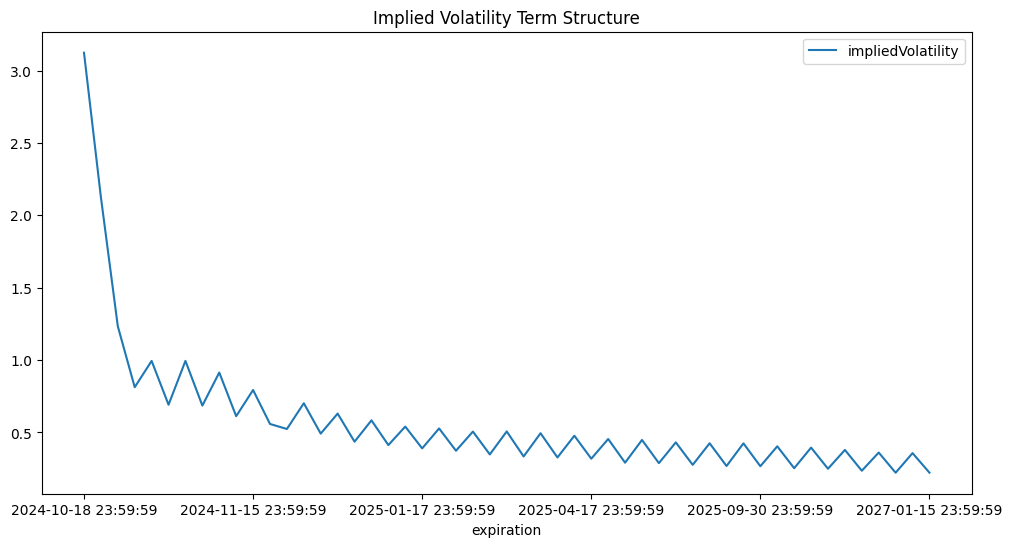

In [69]:
calls_at_strike = options[options["strike"] == 400.0]

# filter out low vols
filtered_calls_at_strike = calls_at_strike[calls_at_strike.impliedVolatility >= 0.001]

# set the strike as the index so pandas plots nicely
filtered_calls_at_strike[["expiration", "impliedVolatility"]].set_index("expiration").plot(
    title="Implied Volatility Term Structure", figsize=(12, 6))

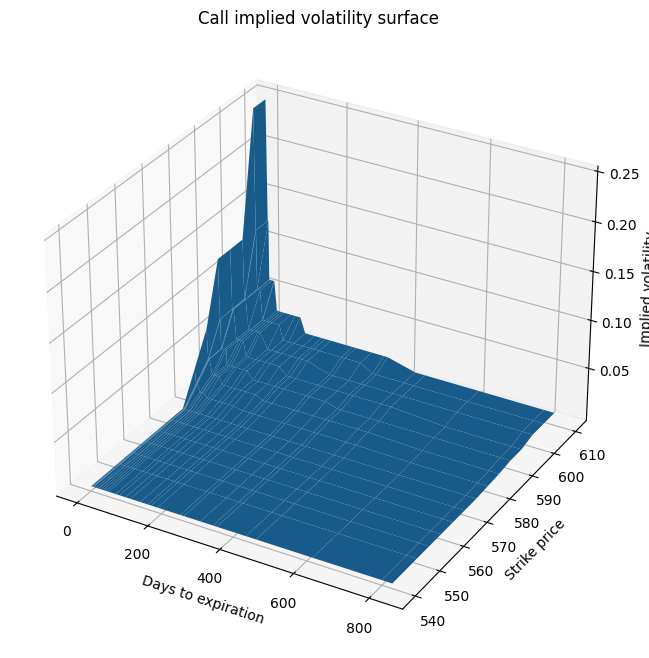

In [17]:
surface = (
    calls[['daysToExpiration', 'strike', 'impliedVolatility']]
    .pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration')
    .dropna()
)

# create the figure object
fig = plt.figure(figsize=(10, 8))

# add the subplot with projection argument
ax = fig.add_subplot(111, projection='3d')

# get the 1d values from the pivoted dataframe
x, y, z = surface.columns.values, surface.index.values, surface.values

# return coordinate matrices from coordinate vectors
X, Y = np.meshgrid(x, y)

# set labels
ax.set_xlabel('Days to expiration')
ax.set_ylabel('Strike price')
ax.set_zlabel('Implied volatility')
ax.set_title('Call implied volatility surface')

# plot
ax.plot_surface(X, Y, z)

In [65]:
calls

,Unnamed: 0,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,daysToExpiration
0,0,SPY241018C00260000,2024-10-17 19:07:08+00:00,260.0,322.95,321.97,323.19,0.520020,0.161281,10.0,725.0,6.109377,True,REGULAR,USD,call,2024-10-18 23:59:59,1
1,1,SPY241018C00265000,2024-10-17 18:27:32+00:00,265.0,317.99,316.97,318.20,2.779999,0.881951,6.0,4.0,5.984378,True,REGULAR,USD,call,2024-10-18 23:59:59,1
2,2,SPY241018C00270000,2024-09-26 15:34:55+00:00,270.0,302.04,311.97,313.18,0.000000,0.000000,101.0,52.0,5.828128,True,REGULAR,USD,call,2024-10-18 23:59:59,1
3,3,SPY241018C00275000,2024-09-26 17:24:39+00:00,275.0,296.38,306.96,308.18,0.000000,0.000000,250.0,150.0,5.679690,True,REGULAR,USD,call,2024-10-18 23:59:59,1
4,4,SPY241018C00280000,2024-10-16 17:14:30+00:00,280.0,301.40,301.98,303.18,0.000000,0.000000,3.0,3.0,5.582034,True,REGULAR,USD,call,2024-10-18 23:59:59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,92,SPY270115C00880000,2024-10-15 13:41:26+00:00,880.0,1.59,1.28,1.80,0.000000,0.000000,2.0,9.0,0.146157,False,REGULAR,USD,call,2027-01-15 23:59:59,820
7279,93,SPY270115C00885000,2024-10-03 17:51:35+00:00,885.0,1.00,0.61,1.68,0.000000,0.000000,NaN,8.0,0.146035,False,REGULAR,USD,call,2027-01-15 23:59:59,820
7280,94,SPY270115C00890000,2024-10-08 16:13:52+00:00,890.0,1.20,0.51,1.77,0.000000,0.000000,2.0,3.0,0.148904,False,REGULAR,USD,call,2027-01-15 23:59:59,820
7281,95,SPY270115C00895000,2024-10-16 19:49:02+00:00,895.0,1.35,0.43,1.91,0.000000,0.000000,1.0,5.0,0.152413,False,REGULAR,USD,call,2027-01-15 23:59:59,820


In [66]:
surface = (
    calls[['daysToExpiration', 'strike', 'impliedVolatility']]
    .pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration')
    .dropna()
)
    

In [67]:
surface

daysToExpiration,1,4,5,6,7,8,14,15,22,29,...,246,256,302,337,348,428,456,609,792,820
strike,,,,,,,,,,,,,,,,,,,,,
550.0,0.709964,0.377448,0.331061,0.312995,0.300056,0.301521,0.259041,0.266487,0.268257,0.258796,...,0.241035,0.238991,0.243133,0.245277,0.243675,0.248077,0.246467,0.253639,0.257965,0.258079
560.0,0.541508,0.269783,0.249763,0.238533,0.230476,0.236214,0.212593,0.221687,0.235786,0.229256,...,0.228661,0.226944,0.232117,0.234756,0.233353,0.238937,0.237808,0.246124,0.252106,0.251263
565.0,0.418463,0.225350,0.211312,0.203987,0.198983,0.204964,0.190926,0.200508,0.220711,0.215401,...,0.222542,0.220917,0.226585,0.229500,0.228249,0.233612,0.233505,0.242378,0.249039,0.249206
570.0,0.331061,0.179085,0.171761,0.167733,0.167245,0.176217,0.170205,0.180489,0.206185,0.202004,...,0.215309,0.215004,0.221100,0.223389,0.223114,0.229073,0.229126,0.238663,0.246345,0.245560
575.0,0.238289,0.139047,0.137460,0.139291,0.141610,0.150033,0.152352,0.162514,0.193276,0.189431,...,0.209297,0.209114,0.215630,0.218186,0.218010,0.224548,0.224815,0.234970,0.242439,0.243286
580.0,0.157235,0.106088,0.111703,0.117379,0.121530,0.129220,0.136178,0.147042,0.180428,0.177285,...,0.203369,0.203385,0.210152,0.213043,0.212937,0.220047,0.220520,0.231270,0.239319,0.240898
590.0,0.123056,0.079111,0.087656,0.092660,0.097909,0.103280,0.113107,0.123056,0.159005,0.156197,...,0.191842,0.192063,0.199532,0.202813,0.202843,0.211052,0.212021,0.223923,0.232925,0.234329
600.0,0.218758,0.109384,0.097665,0.096689,0.094736,0.097665,0.102670,0.110910,0.142983,0.140084,...,0.179803,0.179207,0.188584,0.192887,0.193078,0.202256,0.203606,0.216606,0.227608,0.228752
610.0,0.328132,0.164071,0.144540,0.132821,0.123056,0.115243,0.107431,0.111581,0.133798,0.130685,...,0.169793,0.169419,0.177544,0.182343,0.182030,0.192879,0.193909,0.209450,0.221481,0.224121


In [68]:

# get the 1d values from the pivoted dataframe
x, y, z = surface.columns.values, surface.index.values, surface.values

In [69]:
x

array([  1,   4,   5,   6,   7,   8,  14,  15,  22,  29,  36,  43,  64,
        75,  92, 106, 134, 155, 165, 182, 246, 256, 302, 337, 348, 428,
       456, 609, 792, 820])

In [71]:
import plotly.graph_objects as go
import numpy as np

In [73]:
# Create grid data
surface = (
    calls[['daysToExpiration', 'strike', 'impliedVolatility']]
    .pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration')
    .dropna()
)

x, y = np.meshgrid(x, y)
# get the 1d values from the pivoted dataframe
x, y, z = surface.columns.values, surface.index.values, surface.values

# return coordinate matrices from coordinate vectors
X, Y = np.meshgrid(x, y)

#z = np.sin(np.sqrt(x**2 + y**2))

# Create a 3D surface plot
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])

fig.update_layout(scene=dict(
    xaxis_title='TTM',
    yaxis_title='Strike',
    zaxis_title='Implied Vol'
))

fig.show()

In [76]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255  # Flatten and normalize
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255    # Flatten and normalize

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build the ANN model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

2024-10-23 01:21:31.787372: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 01:21:34.170505: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-10-23 01:21:39.269615: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22835 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:af:00.0, compute capability: 7.5


Epoch 1/10


2024-10-23 01:21:44.434392: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56270d951200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-23 01:21:44.434460: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA TITAN RTX, Compute Capability 7.5
2024-10-23 01:21:44.791408: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-23 01:21:45.123875: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2024-10-23 01:21:45.335093: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:543] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/c

InternalError: Graph execution error:

Detected at node 'Adam/StatefulPartitionedCall_4' defined at (most recent call last):
    File "/opt/tljh/user/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/tljh/user/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/tljh/user/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/opt/tljh/user/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/tljh/user/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/opt/tljh/user/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/opt/tljh/user/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_3791671/256652523.py", line 29, in <module>
      history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/engine/training.py", line 1084, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize
      self.apply_gradients(grads_and_vars)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1230, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1260, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1352, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/opt/tljh/user/lib/python3.9/site-packages/keras/src/optimizers/optimizer.py", line 1347, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'Adam/StatefulPartitionedCall_4'
libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_4}}]] [Op:__inference_train_function_936]

In [77]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [78]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [79]:

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
torch.manual_seed(0)

# Create a dataset
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary labels

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.LongTensor(y)

# Define the model parameters
input_size = 2
hidden_size = 4
output_size = 2

# Initialize weights and biases
w1 = torch.randn(input_size, hidden_size, requires_grad=True) * 0.01
b1 = torch.zeros(hidden_size, requires_grad=True)
w2 = torch.randn(hidden_size, output_size, requires_grad=True) * 0.01
b2 = torch.zeros(output_size, requires_grad=True)

# Define the learning rate
learning_rate = 0.01
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    z1 = X_tensor @ w1 + b1  # Linear transformation
    a1 = torch.relu(z1)      # Activation
    z2 = a1 @ w2 + b2        # Output layer
    loss = nn.CrossEntropyLoss()(z2, y_tensor)  # Compute loss

    # Backward pass
    loss.backward()  # Compute gradients

    # Update weights and biases
    with torch.no_grad():
        w1 = learning_rate * w1.grad
        b1 = learning_rate * b1.grad
        w2 = learning_rate * w2.grad
        b2 = learning_rate * b2.grad

        # Zero gradients for the next iteration
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the decision boundary
with torch.no_grad():
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    z1 = grid @ w1 + b1
    a1 = torch.relu(z1)
    z2 = a1 @ w2 + b2
    Z = torch.argmax(z2, dim=1).reshape(xx.shape)

# Visualize the results
plt.contourf(xx, yy, Z.numpy(), alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('ANN Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/tmp/ipykernel_3791671/3180514870.py:47: UserWarning:

The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)



TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [86]:
import numpy as np
import scipy.stats as si

def NORMSDIST(x):
    NORMSDIST = si.norm.cdf(x,0.0,1.0)
    return(NORMSDIST)

def BlackScholesCall(S,X,r,T,σ):
    d1 = ( (np.log(S/X)+(r+0.5*σ**2)*T) / (σ*np.sqrt(T)) )
    d2 = ( (np.log(S/X)+(r-0.5*σ**2)*T) / (σ*np.sqrt(T)) )
    BlackScholesCall = S* NORMSDIST(d1) - (X*np.exp(-r*T)*NORMSDIST(d2))
    return (BlackScholesCall)

def BlackScholesPut(S,X,r,T,σ):
    d1 = ( (np.log(S/X)+(r+0.5*σ**2)*T) / (σ*np.sqrt(T)) )
    d2 = ( (np.log(S/X)+(r-0.5*σ**2)*T) / (σ*np.sqrt(T)) )
    BlackScholesPut = X*np.exp(-r*T)*NORMSDIST(-d2) - S*NORMSDIST(-d1)
    return (BlackScholesPut)

In [88]:
BlackScholesCall(60,65,0.08,0.25,0.3)
#BlackScholesPut(60,65,0.08,0.25,0.3)

2.1333684449162007

In [90]:
from scipy.optimize import fmin

S = 60
X = 65
r = 0.08
T = 0.25
cm = 4

def ImpliedVolatilityPut(s):
    d1 = ( (np.log(S/X)+(r+0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
    d2 = ( (np.log(S/X)+(r-0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
    of = (  X*np.exp(-r*T)*NORMSDIST(-d2) - S*NORMSDIST(-d1) ) - cm
    val = of**2
    print("[σ]=",s,", Object Function Value:", val)
    return(val)
    
s = fmin(ImpliedVolatilityPut, [0.3])

[σ]= [0.3] , Object Function Value: 3.40875799842813
[σ]= [0.315] , Object Function Value: 4.069023723358144
[σ]= [0.285] , Object Function Value: 2.811328101433215
[σ]= [0.27] , Object Function Value: 2.276047065976109
[σ]= [0.24] , Object Function Value: 1.3883702837801966
[σ]= [0.21] , Object Function Value: 0.7363500738596523
[σ]= [0.15] , Object Function Value: 0.07265282105689887
[σ]= [0.09] , Object Function Value: 0.028693746003626484
[σ]= [-0.03] , Object Function Value: 16.000052347427427
[σ]= [0.15] , Object Function Value: 0.07265282105689887
[σ]= [0.03] , Object Function Value: 0.08241474935086646
[σ]= [0.12] , Object Function Value: 0.0004615441400095954
[σ]= [0.15] , Object Function Value: 0.07265282105689887
[σ]= [0.105] , Object Function Value: 0.00688263949273182
[σ]= [0.135] , Object Function Value: 0.019604971901282374
[σ]= [0.1125] , Object Function Value: 0.0010710193915181127
[σ]= [0.1275] , Object Function Value: 0.006273006909333428
[σ]= [0.11625] , Object Func

In [ ]:

pip install torch torchvision

In [91]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for easier manipulation
data = pd.DataFrame(data=X, columns=iris.feature_names)
data['target'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Define the ANN model parameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 8  # Number of neurons in the hidden layer
output_size = len(np.unique(y))  # Number of classes

# Initialize the model, loss function, and optimizer
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, predicted = torch.max(y_pred, 1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy:.4f}')


Epoch [10/100], Loss: 0.7559
Epoch [20/100], Loss: 0.4954
Epoch [30/100], Loss: 0.3608
Epoch [40/100], Loss: 0.2761
Epoch [50/100], Loss: 0.2217
Epoch [60/100], Loss: 0.1858
Epoch [70/100], Loss: 0.1570
Epoch [80/100], Loss: 0.1316
Epoch [90/100], Loss: 0.1111
Epoch [100/100], Loss: 0.0969
Accuracy: 1.0000
